In this example we are using matplotlib to show a map of 2m temperature that covers Europe and we will create our own color map, first lets import the needed libraries for this.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from colorgen import ColorToolApp
from parsecpt import create_colormap, parse_cpt_string


Now we create the color tool instance and run the GUI, then we'll create our color map

In [2]:
cmap = ColorToolApp()
cmap.mainloop()

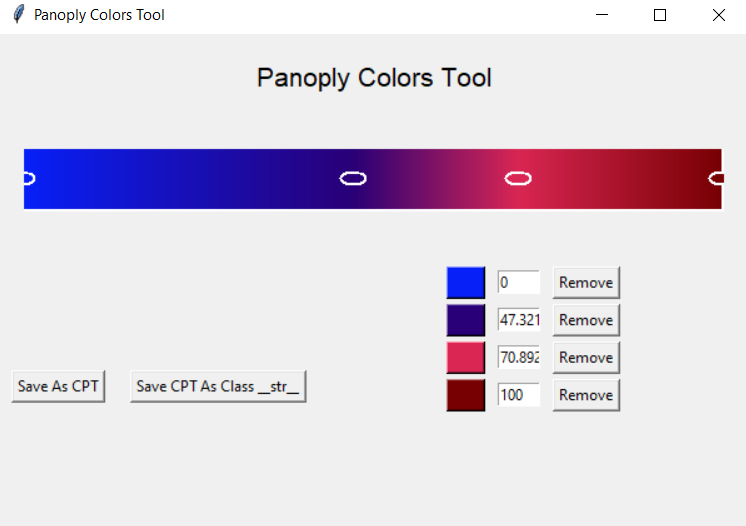

This is a great color bar for temperatures, you can make it however you like and need, next step we'll load the data from a NetCDF file

In [3]:
file_path = 'data/2m_temperature_2024_07.nc'
dataset = xr.open_dataset(file_path)
time_index = 0
temperature = dataset['t2m'][time_index, :, :] - 273.15 #Convert To Celsius, kelvin is impractical in such maps
lat = temperature.coords['latitude'].values
lon = temperature.coords['longitude']

plt.figure(figsize=(12, 6)) #Create the Plot we will work on

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Now that we loaded the needed data we will convert the CPT Data we got into a cmap readable by Matplotlib

In [4]:
cpt_colors = parse_cpt_string(cmap.__str__())
colormap = create_colormap(cpt_colors)

Now we just create the rest of the map normally but make sure to set the cmap as the variable you used create_colormap() in.

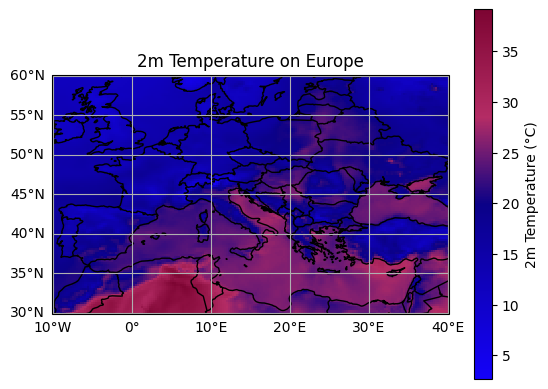

In [5]:
ax = plt.axes(projection=ccrs.PlateCarree())
temperature.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=colormap, cbar_kwargs={'label': '2m Temperature (°C)'})
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title(f'2m Temperature on Europe')
plt.show()